In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('./Data.csv',header=0,sep=',')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [4]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [5]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data/len(df)*100
    print(f"Missing values for {col}: {missing_percent:.2f}%")

Missing values for Country: 0.00%
Missing values for Age: 10.00%
Missing values for Salary: 10.00%
Missing values for Purchased: 0.00%


<Axes: >

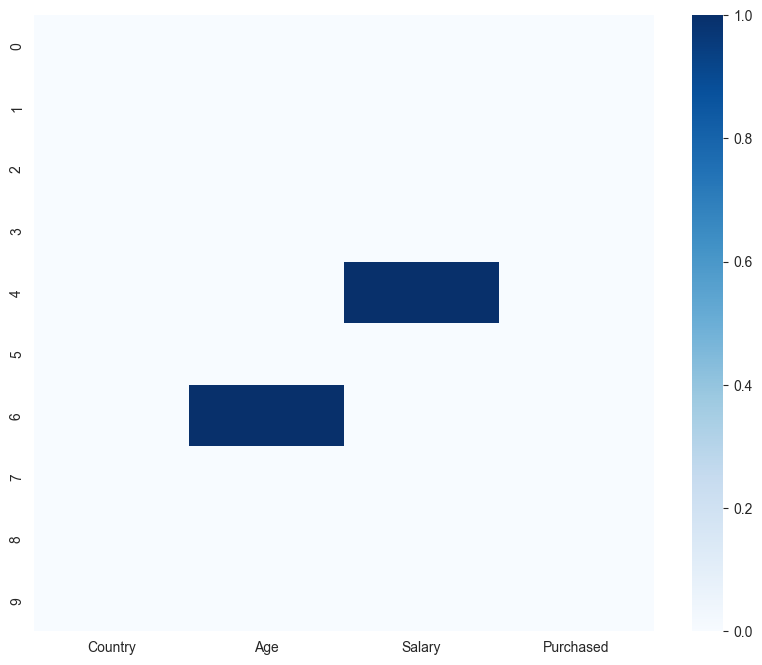

In [6]:
fig , ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),cmap="Blues")

In [31]:
x = df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [17]:
y = df.iloc[:,3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [42]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train

array([[0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.transform(x_test[:,3:])


In [46]:
x_train

array([[0.0, 1.0, 0.0, -0.5773502691896258, -0.7529426005471072,
        -0.6260377781240918],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.008453807952985,
        1.0130429500553495],
       [0.0, 1.0, 0.0, -0.5773502691896258, 1.7912966561752484,
        1.8325833141450703],
       [1.0, 0.0, 1.0, -0.5773502691896258, -1.7314961608249362,
        -1.0943465576039322],
       [0.0, 1.0, 0.0, -0.5773502691896258, -0.3615211764359756,
        0.42765697570554906],
       [1.0, 0.0, 1.0, -0.5773502691896258, 0.22561095973072184,
        0.05040823668012247],
       [1.0, 0.0, 0.0, 1.7320508075688774, -0.16581046438040975,
        -0.27480619351421154],
       [1.0, 0.0, 0.0, 1.7320508075688774, -0.013591021670525094,
        -1.3285009473438525]], dtype=object)

In [47]:
x_test

array([[1.0, 0.0, 1.0, -0.5773502691896258, 2.1827180802863797,
        2.3008920936249107],
       [1.0, 0.0, 0.0, 1.7320508075688774, -2.3186282969916334,
        -1.7968097268236927]], dtype=object)